In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,glob
import sys

sys.path.append('/home/lukas/projects/growthratedifferences/programs')
import growthclass as gc


In [2]:
def LMSQ(x,y):
    n   = len(x)
    sx  = np.sum(x)
    sy  = np.sum(y)
    sxx = np.dot(x,x)
    sxy = np.dot(x,y)
    syy = np.dot(y,y)
    
    denom  = (n*sxx-sx*sx)
    b      = (n*sxy - sx*sy)/denom
    a      = (sy-b*sx)/n
    estim  = np.array([a,b],dtype=np.float)

    sigma2 = syy + n*a*a + b*b*sxx + 2*a*b*sx - 2*a*sy - 2*b*sxy
    cov    = sigma2 / denom * np.array([[sxx,-sx],[-sx,n]],dtype=np.float)

    return estim,cov


In [3]:
datadir = '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/'
datafiles = glob.glob(datadir + 'popdyn.*.txt')
data = gc.GrowthData(infiles = datafiles,verbose = True)

reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0316.r013.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0316.r013.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0316.r014.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0316.r014.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N1000.r004.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N1000.r004.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0010.r019.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0010.r019.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0032.r001.txt' and '/home/lukas/projects/gr

reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0100.r012.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0100.r012.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0003.r007.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0003.r007.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0010.r015.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0010.r015.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0032.r017.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0032.r017.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0003.r002.txt' and '/home/lukas/projects/gr

reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0003.r012.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0003.r012.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0003.r017.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0003.r017.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N1000.r019.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N1000.r019.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0010.r001.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0010.r001.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0003.r003.txt' and '/home/lukas/projects/gr

reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0010.r017.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0010.r017.txt'
reading files '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/popdyn.N0100.r015.txt' and '/home/lukas/projects/growthratedifferences/simulations/190911_initialsize/divtime.N0100.r015.txt'


(0.8, 1.2)

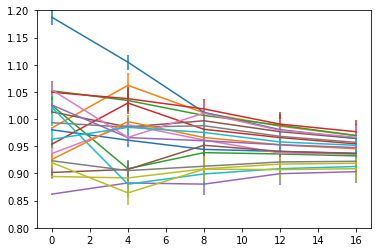

In [7]:
intervalsize = 4
initialsize  = 3

for fn,d in data.getDataInitialSize(popsize = initialsize):

    curdata = list()
    
    maxtime = intervalsize
    mintime = 0

    p               = data.ParametersFromFilename(fn)    
    initialdivtimes = np.array(d.head(initialsize)['divtime'])
    
    curdata.append([0,np.mean(initialdivtimes),np.var(initialdivtimes)])
    
    #print("{:4d} {:3d} {:.6f} {:.6f}".format(p[1],*curdata[-1]))
    
    while mintime < np.max(d['time']):
        restricted1 = np.array(d['time'] > mintime)
        restricted2 = np.array(d['time'] < maxtime)
        restricted = [r1 and r2 for r1,r2 in zip(restricted1,restricted2)]
    
        r = d[restricted]
        #h,b = np.histogram(r['divtime'],range = (0,2),bins=50,density=True)
        #b = b[:-1] + np.diff(b)
        #plt.plot(b,h)
        
        mintime += intervalsize
        maxtime += intervalsize
        
        curdata.append([mintime,np.mean(r['divtime']),np.var(r['divtime'])])
        #print("{:4d} {:3d} {:.6f} {:.6f}".format(p[1],*curdata[-1]))
    
    
    curdata = np.array(curdata,dtype = np.float)
    plt.errorbar(curdata[:,0],curdata[:,1],yerr=curdata[:,2])

plt.ylim((.8,1.2))

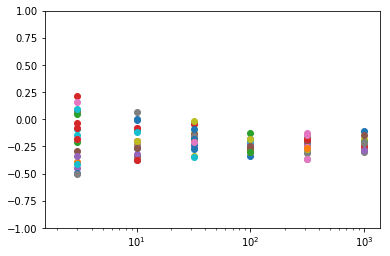

In [9]:
for dtfile in glob.glob(datadir + 'divtime.N*.*'):
    data    = np.genfromtxt(dtfile)
    param   = [int(x[1:]) for x in dtfile.split('.')[1:3]]
    x       = np.arange(len(data),dtype = np.float)
    fit,cov = LMSQ(x,data)

    plt.scatter([param[0]],[fit[1]*1e6])
plt.ylim((-1,1))
plt.xscale('log')

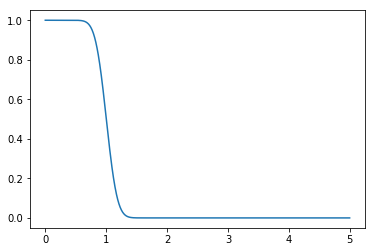

In [20]:
def gauss(x,mean = 1.,var = 0.02):
    return np.exp(-.5*(x-mean)**2/var)/np.sqrt(2*np.pi*var)

x = y = np.linspace(0,5,num=1001)
dx = np.diff(x)[0]
norm = [np.sum(gauss(x[i:]))*dx for i in range(len(x))]


plt.plot(x,norm)

#remaining = [gauss(x)*gauss(x-y)


#plt.plot(y,gauss(x))
